<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/MS_spherical_collocation_shift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

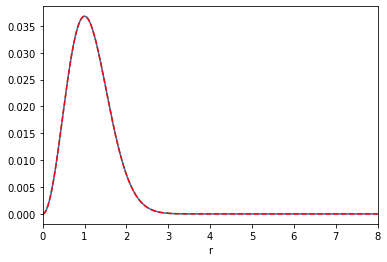

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 30                                                  # Truncation ordem

L0 = 2                                               # Map parameter 

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))      # collocation points (Verificado)

colr = col[1:N+2]

r = L0 * colr/(np.sqrt(1-colr**2))                       # physical domain (Verificado)             

r1 = L0 * colr/(np.sqrt(1-colr**2))                       # physical domain (Verificado)             


r = np.flip(r1)


out_r = open('r_30_L02.txt', 'a')
out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


psi = SB[0:N+1,:]        # Base function
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]

# Initial conditions of Phi                                     

r0 = 0

A0 = 0.05

sigma = 1

Phi_0 = A0*r**2*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))            # Phi initial data (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)  (Verificado)

out_a = open('a0_30_L02.txt', 'a')
out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions ph Phi

M = 3000       # plot truncation

rplot = np.linspace(0.000001,10,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phi_plot0 = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))      


Phiplot = np.dot(a0, psiplot)


erro = Phi_plot0 - Phiplot

plt.plot(rplot, Phiplot, rplot, Phi_plot0, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()



In [20]:
r

array([ 0.04987689,  0.14987928,  0.25063252,  0.35265396,  0.45648695,
        0.56271275,  0.67196426,  0.78494216,  0.90243437,  1.02534017,
        1.15470054,  1.29173695,  1.43790208,  1.59494678,  1.76501047,
        1.95074494,  2.15548737,  2.38350719,  2.64036663,  2.93346123,
        3.27285491,  3.67261586,  4.15304279,  4.74456058,  5.49495484,
        6.48384075,  7.8544943 ,  9.89342989, 13.269133  , 19.98698996,
       40.07379578])

In [7]:
a0

array([ 1.88270588e-02, -3.33223271e-03, -1.00634100e-02,  1.01625180e-02,
       -3.19295076e-03, -8.44479551e-04,  6.37619268e-04,  1.62704183e-04,
       -1.14245359e-04, -5.29979500e-05,  1.42130958e-05,  1.63766457e-05,
        1.69812552e-06, -3.57322028e-06, -1.86750158e-06,  1.66189113e-07,
        5.99679606e-07,  2.48034043e-07, -4.71711141e-08, -1.00298604e-07,
       -4.27070249e-08,  6.05711469e-09,  1.73159062e-08,  9.01338349e-09,
        1.83211111e-10, -2.89463726e-09, -2.06141707e-09, -4.58525805e-10,
        4.05955882e-10,  5.03094137e-10,  2.74365498e-10])

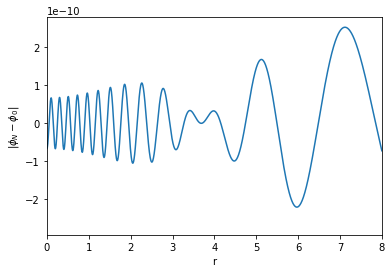

In [21]:
plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [22]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i]  =   0.001
  
Chi=np.dot(c0,psi)    
rChi=np.dot(c0,rpsi)
rrChi=np.dot(c0,rrpsi)     

H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2

JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi     # Jacobian Matrix

In [23]:
H0

array([-2.52990355e+00,  9.67886266e-01, -7.17000992e-01,  6.63391056e-01,
       -6.50165453e-01,  6.71965766e-01, -6.83537464e-01,  7.05393398e-01,
       -7.10238850e-01,  7.14932125e-01, -7.02212852e-01,  6.87385525e-01,
       -6.54531292e-01,  6.21712534e-01, -5.73119825e-01,  5.25724876e-01,
       -4.68210164e-01,  4.12901682e-01, -3.52988611e-01,  2.97499070e-01,
       -2.41660587e-01,  1.92481710e-01, -1.46137215e-01,  1.07797034e-01,
       -7.41895352e-02,  4.87154479e-02, -2.84445269e-02,  1.51535118e-02,
       -6.20000437e-03,  1.94986050e-03, -1.44825471e-04])

In [24]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i]  =   0.001
  
Chi=np.dot(c0,psi)    
rChi=np.dot(c0,rpsi)
rrChi=np.dot(c0,rrpsi)     

H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2

JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi     # Jacobian Matrix

inv_JH = np.linalg.inv(JH)

N_int = 50

tolerance = 1e-40    # tolerance

N_int = 10

#tol = 1e-29     # tolerance
#while min(abs(np.dot(H0, inv_JH))) >= tol:

# Newton Raphson loop
for i in range(N_int):
  Chi=np.dot(c0,psi)
  rChi=np.dot(c0,rpsi)
  rrChi=np.dot(c0,rrpsi)
  H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2
  JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi
  cnew = c0 - np.dot(H0, inv_JH)
  if min(abs(cnew-c0)) < tolerance:
    break
  print(min(abs(cnew-c0)), end=' ')
  c0 = cnew

out_c = open('c0_30_L02.txt', 'a')
out_c.write(' ' +' '.join(str('%.18f'%n) for n in c0)+'\n')
out_c.close()

c0

0.0010001935358057358 1.9418498446230948e-07 7.254270178827667e-10 7.521642538400678e-11 1.230679924338276e-12 2.0120486154405646e-14 3.1494855121368576e-16 4.904089467404301e-18 7.620608536658881e-20 1.2092562916974221e-21 

array([ 2.94913244e-04, -2.40729179e-05, -7.34785696e-06, -6.23356858e-07,
        3.91343243e-06, -2.19227209e-07, -2.41042410e-06,  1.64827188e-06,
       -1.34615955e-07, -3.08424872e-07,  8.27311339e-08,  5.55820993e-08,
       -2.00518809e-08, -1.21186884e-08,  3.79874673e-09,  3.08340171e-09,
       -4.73864451e-10, -8.01222635e-10, -4.16717201e-11,  1.87252800e-10,
        5.79422014e-11, -3.10642113e-11, -2.39939122e-11,  6.33414445e-13,
        6.80648560e-12,  2.46021990e-12, -8.12541786e-13, -9.20517498e-13,
       -1.41399347e-13,  2.92671238e-13,  2.19254323e-13])

Field equations

In [25]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])


# Base functions for Beta

SB2 = np.zeros([N+1,N+1])      
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])

for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)


    

Quadrature Integration

In [26]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+3,Nq+1])                # Base function in quadrature points
qrSB = np.zeros([Nq+3,Nq+1])
qrrSB = np.zeros([Nq+3,Nq+1])




for i in range(Nq+1+1+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1+1+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1+1+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                                         


qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]

# Initial values of Krr:


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
qrSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
qrrSB1 = 1/2*(qrrSB[1:(N+2),:] + qrrSB[0:(N+1),:])


#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

psi_0 = np.zeros(N+1)

for i in range(N+1):
  psi_0[i,] = np.sin((2*i+1)*math.pi/2)     # arccot(0) = Pi/2  

#Alpha_0 = 1 + np.dot(al0, psi_0) 

In [27]:
# Runge Kutta 4th order

h = 0.001   # step size
tf = 5

It = int(tf/h)

t = np.linspace(0, tf, It) 

phi_set = np.zeros([It,M])   
chi_set = np.zeros([It,M])
pi_set = np.zeros([It,M])
L2HC = np.zeros([It])  
#Alpha0_a005 = np.zeros([It])
#Alpha0_a007 = np.zeros([It])
#Alpha0_a0081 = np.zeros([It])
#Alpha0_a002 = np.zeros([It])
Alpha_origin = np.zeros([It])
phi_origin = np.zeros([It])


V = 0

for i in range(It): 

  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)      
  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)   
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC[i,] = (1/2*np.dot(H**2,wq_col))**(1/2)     # L2 error of HC 
  
  # Alpha in r=0
  Alpha_origin[i] = 1 + np.dot(al0, psi_0)

  #Phi origin:
  phi_origin[i] = np.dot(a0, psi_0)

  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  

  print(a0)
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  out_a = open('a_30_L02.txt', 'a')
  out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
  phi_set[i,:] = np.dot(a0, psiplot)
  pi_set[i,:] = np.dot(b0, psiplot)
  chi_set[i,:] = np.dot(c0, psiplot)
  
  
a = np.loadtxt("a_30_L02.txt", dtype = "float")




Streaming output truncated to the last 5000 lines.
[-9.22663100e-04 -1.33096157e-03  2.70595507e-04  1.52305045e-03
  8.54772388e-04 -6.35469809e-04 -1.21713625e-03 -5.77299070e-04
  3.04837622e-04  6.13011322e-04  3.44010310e-04 -5.44189454e-06
 -1.25515165e-04 -4.37913675e-05  1.88203085e-05 -3.11651790e-05
 -1.44591316e-04 -1.76624805e-04 -8.23078414e-05  9.43926443e-05
  2.18692949e-04  2.18854602e-04  8.50593053e-05 -8.42555299e-05
 -2.01907168e-04 -1.95751635e-04 -9.37460761e-05  5.23190964e-05
  1.51400265e-04  1.72398087e-04  1.03175415e-04]
[-9.21622268e-04 -1.33013425e-03  2.69100959e-04  1.52161165e-03
  8.55850601e-04 -6.33329205e-04 -1.21671594e-03 -5.78821608e-04
  3.03366129e-04  6.13024366e-04  3.45001284e-04 -4.78529513e-06
 -1.25719948e-04 -4.42810117e-05  1.87670526e-05 -3.07105543e-05
 -1.44173934e-04 -1.76717177e-04 -8.28759970e-05  9.38208202e-05
  2.18543964e-04  2.19202847e-04  8.56054606e-05 -8.38778723e-05
 -2.01894967e-04 -1.96017334e-04 -9.40670257e-05  5.21

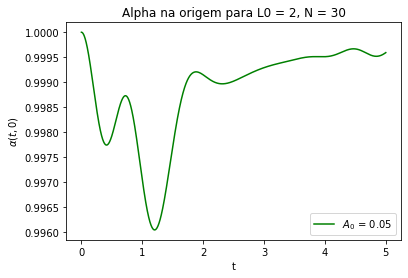

In [28]:
t1 = np.linspace(0, tf, len(Alpha_origin)) 

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para L0 = 2, N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.legend()

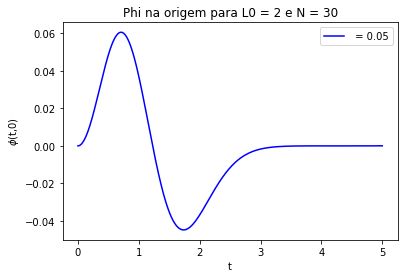

In [29]:
plt.plot(t1, phi_origin, color = "b", label = " = {:}".format(A0))
plt.title("Phi na origem para L0 = 2 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")  
#plt.xlim(7.2,8.2)
plt.legend() 

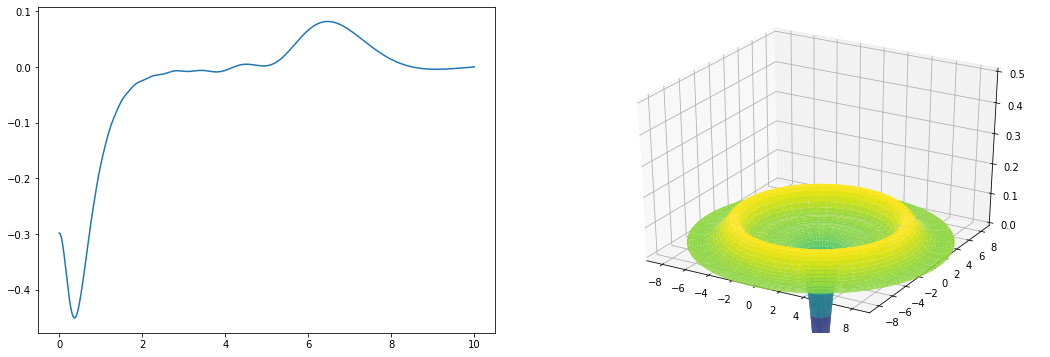

In [ ]:

# Plot 3D from Phi initial:


from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

y = phi_set[4999,:]
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[i,:], y[i])

ax1.plot(x, y)
ax2.plot_surface(xn, yn, zn,cmap='viridis')
ax2.set_xlim(-9,9)
ax2.set_ylim(-9,9)
ax2.set_zlim(0,0.5)
plt.show()

In [ ]:

tf = 7

# Animation plot for Phi: Scalar Field

#from matplotlib.animation import FuncAnimation
#from IPython.display import HTML

#fig = plt.figure()
#ax = plt.axes(xlim=(0, 15),ylim = (-0.5, 1))
#line, = ax.plot([], [], lw=2)

x = rplot

def init():
    line.set_data([], [])
    return line,

def animate(i):
  y = phi_set[i,:]
  line.set_data(x, y)
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)

HTML(anim.to_html5_video())

Text(0.5, 1.0, 'log(L2Hc) para $N = 30$, $L_0 = 6$ e $A_0 = 0.05$')

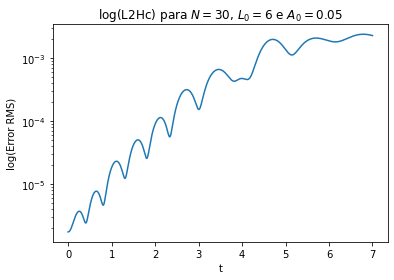

In [ ]:
# Erro L2 of Hamiltonian constraint

plt.plot(t,L2HC)
plt.yscale("log")
plt.ylabel("log(Error RMS)")
plt.xlabel("t")
plt.title("log(L2Hc) para $N = 30$, $L_0 = 6$ e $A_0 = 0.05$")

In [ ]:
L2HC_30max_L06 = max(L2HC)


L2HC_30max_L06

0.002484056936002491

In [ ]:
L2HC_60max_L06 = max(L2HC)

L2HC_60max_L06

4.2354407714815734e-05

In [ ]:
L2HC_90max_L06 = max(L2HC)

L2HC_90max_L06

8.707534373859146e-07

In [ ]:
L2HC_120max_L06 = max(L2HC)

L2HC_120max_L06

1.1946556397992398e-08

In [ ]:
L2HC_150max_L06 = max(L2HC)

L2HC_150max_L06 

3.0319088210686514e-09

In [ ]:
L2HC_180max_L06 = max(L2HC)

L2HC_180max_L06

1.8609523773245208e-09

In [ ]:
L2HC_210max_L06 = max(L2HC)

L2HC_210max_L06

1.2751386846020075e-09

In [ ]:
L2HC_30max_L02

0.08368416315314683

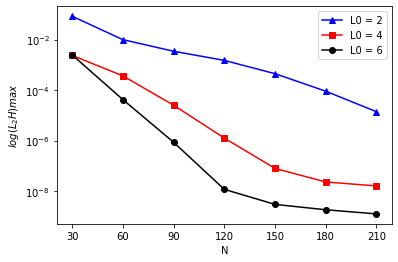

In [ ]:


L2HC_L02 = [L2HC_30max_L02, L2HC_60max_L02,L2HC_90max_L02, L2HC_120max_L02,L2HC_150max_L02, L2HC_180max_L02,L2HC_210max_L02]



L2HC_L04 = [L2HC_30max_L04, L2HC_60max_L04,L2HC_90max_L04, L2HC_120max_L04,L2HC_150max_L04, L2HC_180max_L04,L2HC_210max_L04]



L2HC_L06 = [L2HC_30max_L06, L2HC_60max_L06,L2HC_90max_L06, L2HC_120max_L06,L2HC_150max_L06, L2HC_180max_L06,L2HC_210max_L06]

N = [30,60,90,120,150,180,210]

N_max = 210

plt.plot(N, L2HC_L02, '-b^', label = "L0 = 2")
plt.plot(N, L2HC_L04, '-rs',label = "L0 = 4")
plt.plot(N, L2HC_L06, '-ko',label = "L0 = 6")
plt.xticks(N)
plt.xlabel('N')
plt.ylabel('$log(L_2 H)max$')
plt.yscale('log')
plt.legend()
plt.show()